In [1]:
import pandas as pd

# Load train, validation, and test datasets
train_df = pd.read_csv('../datasets/CREMA-D/MELD-master/data/MELD/train_sent_emo.csv')
val_df = pd.read_csv('../datasets/CREMA-D/MELD-master/data/MELD/dev_sent_emo.csv')
test_df = pd.read_csv('../datasets/CREMA-D/MELD-master/data/MELD/test_sent_emo.csv')

# Display the first few rows of the training dataset
print("Train Dataset Head:")
print(train_df.head())

print("Columns:", train_df.columns)


Train Dataset Head:
   Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my company’s tr...         Chandler   
1       2                   You must’ve had your hands full.  The Interviewer   
2       3                            That I did. That I did.         Chandler   
3       4      So let’s talk a little bit about your duties.  The Interviewer   
4       5                             My duties?  All right.         Chandler   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   neutral   neutral            0             0       8       21   
1   neutral   neutral            0             1       8       21   
2   neutral   neutral            0             2       8       21   
3   neutral   neutral            0             3       8       21   
4  surprise  positive            0             4       8       21   

      StartTime       EndTime  
0  00:16:16,059  00:16:21,731  
1  00:16:21,94

In [2]:
print("Training Dataset Info:")
print(train_df.info())
print("\nValidation Dataset Info:")
print(val_df.info())
print("\nTest Dataset Info:")
print(test_df.info())


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB
None

Validation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        1109 non-null   int64 
 1   Utt

In [3]:
print("Missing Values in Training Data:")
print(train_df.isnull().sum())


Missing Values in Training Data:
Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64


In [5]:
!pip install matplotlib

  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp39-cp39-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.0-cp39-cp39-win_amd64.whl (2.2 MB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


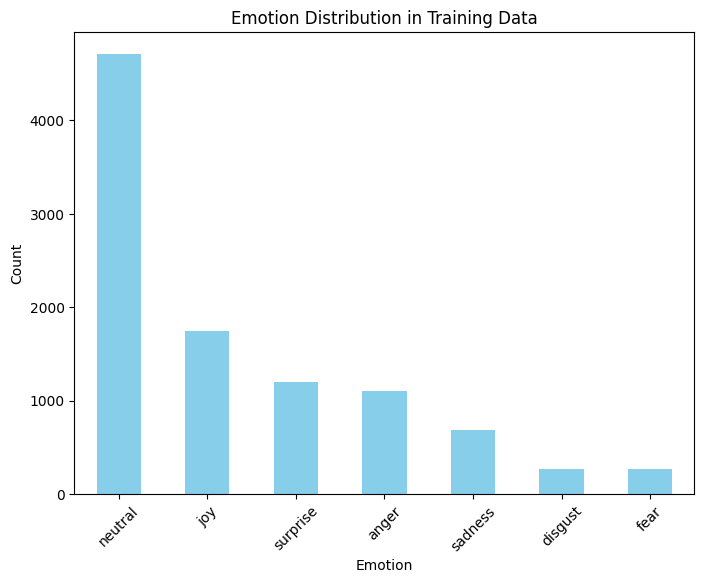

In [6]:
import matplotlib.pyplot as plt

# Emotion distribution in training data
emotion_counts = train_df['Emotion'].value_counts()

plt.figure(figsize=(8, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title("Emotion Distribution in Training Data")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


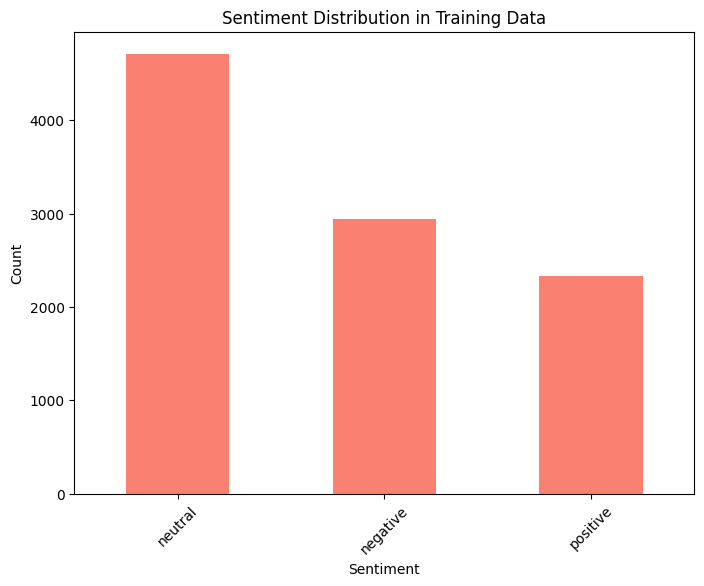

In [7]:
# Sentiment distribution in training data
sentiment_counts = train_df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='salmon')
plt.title("Sentiment Distribution in Training Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


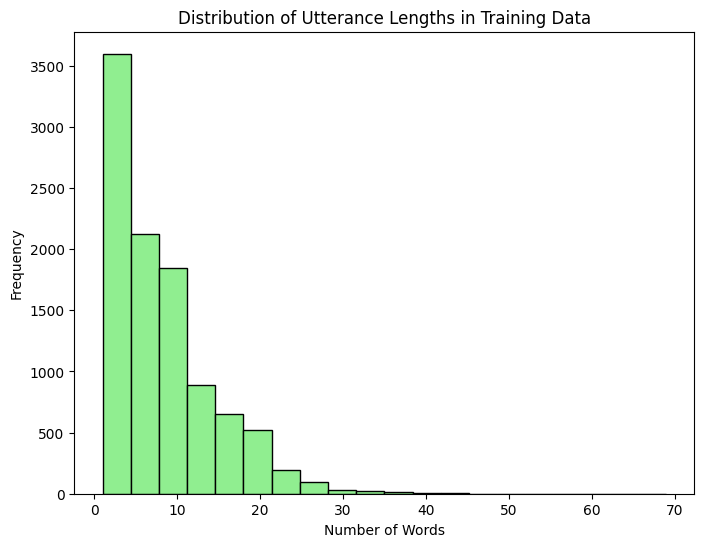

In [8]:
# Add a column for utterance length
train_df['Utterance_Length'] = train_df['Utterance'].apply(lambda x: len(x.split()))

# Plot utterance length distribution
plt.figure(figsize=(8, 6))
train_df['Utterance_Length'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of Utterance Lengths in Training Data")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [9]:
print("Longest Utterance:")
print(train_df.loc[train_df['Utterance_Length'].idxmax()])

print("\nShortest Utterance:")
print(train_df.loc[train_df['Utterance_Length'].idxmin()])


Longest Utterance:
Sr No.                                                           4469
Utterance           Um, ok, uh, oh god, um, when you and uh Ross f...
Speaker                                                        Rachel
Emotion                                                       sadness
Sentiment                                                    negative
Dialogue_ID                                                       455
Utterance_ID                                                       11
Season                                                              2
Episode                                                             2
StartTime                                                00:20:55,629
EndTime                                                  00:21:06,222
Utterance_Length                                                   69
Name: 4239, dtype: object

Shortest Utterance:
Sr No.                        13
Utterance               Really?!
Speaker                 Chan

C:\Users\dell\AppData\Local\Temp\ipykernel_20436\1349432288.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  emotion_shifts = train_df.groupby('Dialogue_ID').apply(count_emotion_shifts)


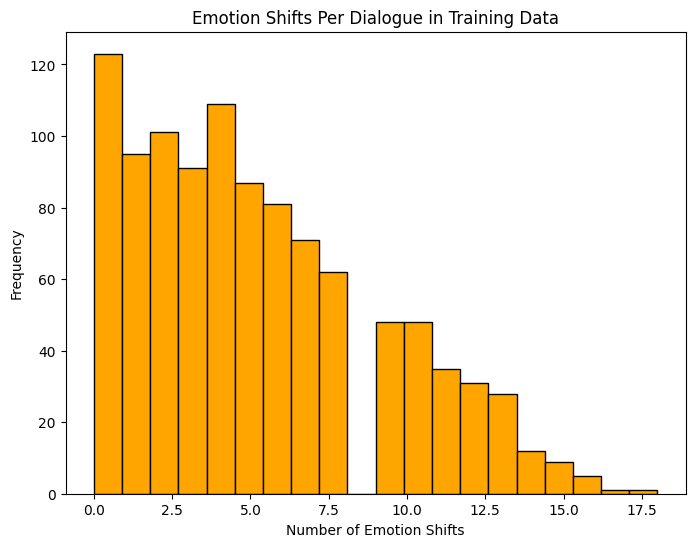

In [10]:
# Check for emotion shifts within dialogues
def count_emotion_shifts(dialogue):
    return (dialogue['Emotion'] != dialogue['Emotion'].shift()).sum() - 1

emotion_shifts = train_df.groupby('Dialogue_ID').apply(count_emotion_shifts)

plt.figure(figsize=(8, 6))
emotion_shifts.plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.title("Emotion Shifts Per Dialogue in Training Data")
plt.xlabel("Number of Emotion Shifts")
plt.ylabel("Frequency")
plt.show()


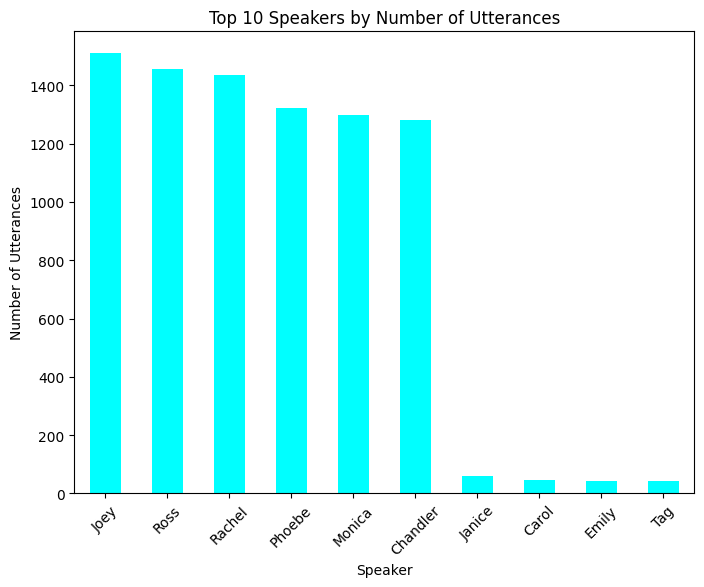

In [11]:
speaker_counts = train_df['Speaker'].value_counts()

plt.figure(figsize=(8, 6))
speaker_counts.head(10).plot(kind='bar', color='cyan')
plt.title("Top 10 Speakers by Number of Utterances")
plt.xlabel("Speaker")
plt.ylabel("Number of Utterances")
plt.xticks(rotation=45)
plt.show()


In [13]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


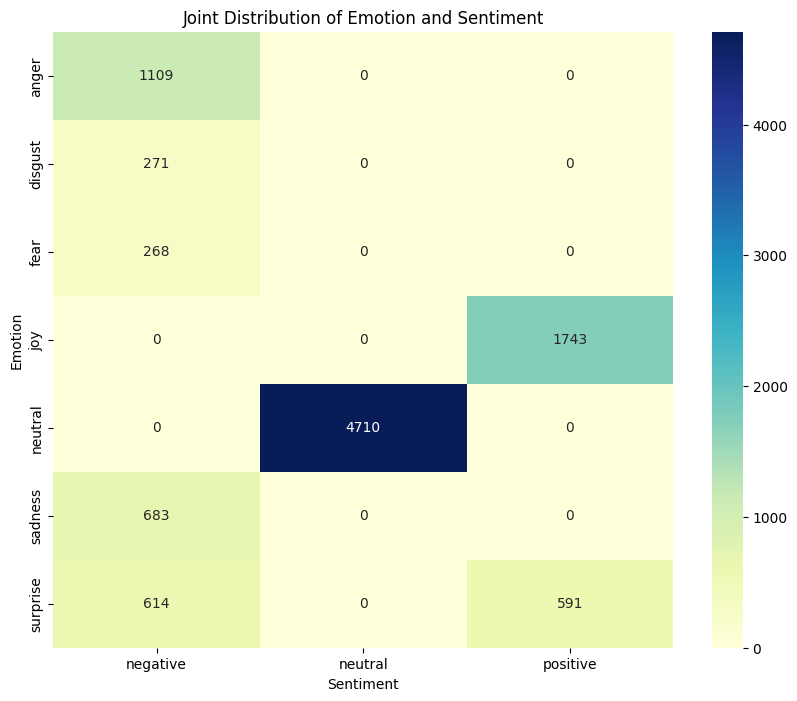

In [14]:
import seaborn as sns

# Create a pivot table for emotion and sentiment
pivot_table = train_df.pivot_table(index='Emotion', columns='Sentiment', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Joint Distribution of Emotion and Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Emotion")
plt.show()
